In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Załóżmy, że mamy dane dotyczące sprzedaży w sklepie internetowym.
data = {
    'OrderDate': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-03', 
                  '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-06', '2024-01-07'],
    'Category': ['Electronics', 'Furniture', 'Furniture', 'Electronics', 'Clothing', 
                 'Clothing', 'Electronics', 'Furniture', 'Clothing', 'Furniture'],
    'Sales': [200, 450, 300, 500, 150, 400, 700, 300, 200, 350],
    'Quantity': [2, 5, 3, 4, 1, 4, 6, 3, 2, 5]
}

df = pd.DataFrame(data)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.head()

,OrderDate,Category,Sales,Quantity
0,2024-01-01,Electronics,200,2
1,2024-01-01,Furniture,450,5
2,2024-01-02,Furniture,300,3
3,2024-01-03,Electronics,500,4
4,2024-01-03,Clothing,150,1


## Prosta agregacja na kategoriach: Sumaryczna sprzedaż

Na początek wykonajmy prostą agregację, sumując sprzedaż dla każdej kategorii. Następnie zobaczymy, jak zwizualizować te dane.

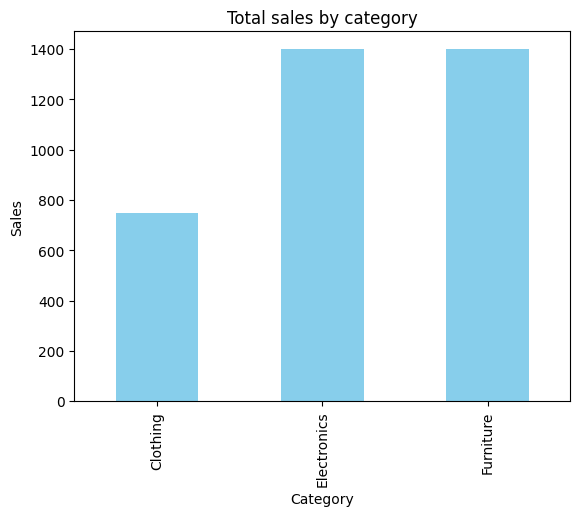

Category
Clothing        750
Electronics    1400
Furniture      1400
Name: Sales, dtype: int64


In [3]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar', color='skyblue')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.title('Total sales by category')
plt.show()
print(category_sales)

## Agregacja na datach: Średnia sprzedaż dzienna

Teraz wykonajmy agregację na podstawie dat, obliczając średnią dzienną sprzedaż.

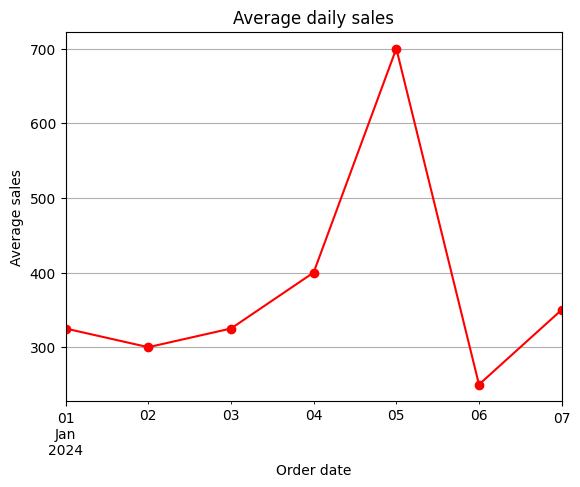

In [4]:
df.groupby('OrderDate')['Sales'].mean().plot(kind='line', marker='o', color='red')
plt.ylabel('Average sales')
plt.xlabel('Order date')
plt.title('Average daily sales')
plt.grid()
plt.show()

## Wykres z wieloma seriami

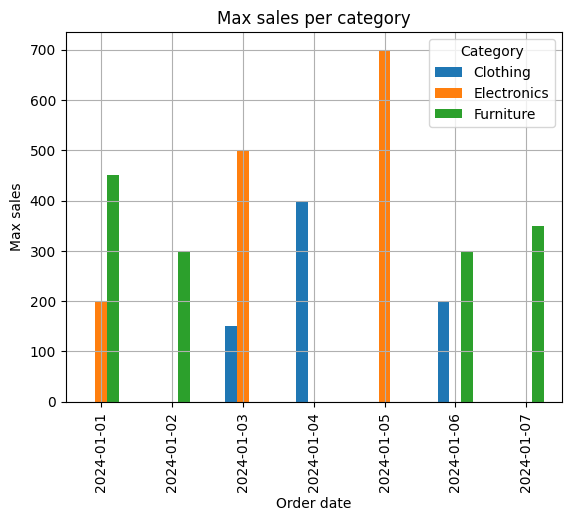

In [14]:
max_sales_per_category = df.groupby(['OrderDate','Category'])['Sales'].max().unstack()
max_sales_per_category.index = max_sales_per_category.index.strftime('%Y-%m-%d')

max_sales_per_category.plot(kind='bar')
plt.ylabel('Max sales')
plt.xlabel('Order date')
plt.title('Max sales per category')
plt.grid()
plt.show()

## plt.plot() vs. DataFrame.plot() / Series.plot()

#### plt.plot():

- **Matplotlib-centric**: Jest to podejście stricte związane z Matplotlib. plt.plot() jest podstawową funkcją Matplotlib do rysowania wykresów liniowych, gdzie dane są zazwyczaj przekazywane w postaci list, tablic NumPy lub kolumn z DataFrame.
- **Ręczne przekazywanie danych**: Aby narysować wykres, musisz ręcznie przekazać dane na osi X i Y.

#### category_sales.plot(kind='bar', color='skyblue'):

- **Pandas-centric**: Pandas posiada wbudowane metody do tworzenia wykresów bezpośrednio z obiektów DataFrame i Series. Te metody wykorzystują Matplotlib pod spodem, ale oferują bardziej zintegrowane podejście do pracy z danymi zapisanymi w strukturach Pandas.
- Automatyczne przekazywanie danych: Gdy używasz plot() bezpośrednio na DataFrame lub Series, Pandas automatycznie korzysta z indeksów i wartości, co upraszcza proces tworzenia wykresów.
- **Rodzaje wykresów**: Możesz łatwo zmienić typ wykresu, ustawiając argument kind (np. kind='bar' dla wykresu słupkowego, kind='line' dla liniowego, kind='hist' dla histogramu itp.).

### Dlaczego wciąż warto importować Matplotlib?

- **Kontrola nad wykresami**: Chociaż Pandas umożliwia szybkie tworzenie wykresów, Matplotlib oferuje pełną kontrolę nad wszystkimi aspektami wykresu, takimi jak dodawanie tytułów, etykiet osi, siatek, dostosowywanie stylów, rozmiarów figur, legend itp. Nawet jeśli zaczynasz od DataFrame.plot(), często chcesz dostosować szczegóły wykresu, co wymaga użycia funkcji Matplotlib.
- **Dostęp do zaawansowanych funkcji**: Pandas.plot() jest uproszczonym interfejsem do Matplotlib i nie obsługuje wszystkich zaawansowanych funkcji, takich jak dodawanie drugiej osi Y czy specyficzne dostosowywanie układu wykresu. Gdy potrzebujesz czegoś bardziej zaawansowanego, Matplotlib jest konieczny.
- **Zarządzanie figurami i osiami**: Matplotlib pozwala na tworzenie bardziej skomplikowanych układów z wieloma figurami i osiami, które mogą być trudniejsze do zarządzania wyłącznie za pomocą Pandas.plot(). W wielu przypadkach Pandas.plot() jest początkiem, ale do bardziej złożonych wizualizacji potrzeba funkcji Matplotlib.